<a href="https://colab.research.google.com/github/nchebet09/Naomi-s-Week-7-IP/blob/master/Naomi's_Week_7_IP%2C_Moringa_School.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Documentation

### a.) Specify the question

Study the factors that affect the housing prices then create a model that would allow the company to accurately predict the sale of prices, for a house, upon being provided with the predictor variables. 

### b.) What is the metric of success?

RMSE
MSE

### c.) Understanding the context

### d.) Experimental design

### e.) Data relevance

## Reading and initial data exploration

In [92]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore') # ignores all the warnings making the notebook cleaner

In [2]:
# loading data

data = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

In [3]:
# previewing head

data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# previewing tail

data.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
# checking for shape
data.shape

# our dataset has 21,613 records and 20 columns

(21613, 20)

In [6]:
# checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [7]:
# Checking the columns in our dataset

data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
# checking for unique values in all the columns
data.nunique()

# we see that ID has 21,436 entries that are unique, but then the total entries for the dataset were 21,613 
# so it's possible that the data has duplicated values

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [9]:
# exploring further on unique values in some of the columns

data['bedrooms'].unique()


array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [10]:
data['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [11]:
data['floors'].unique()

# do we have a 0.5 floors?

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [12]:
data['waterfront'].unique()

# this is a categorical variable(yes, no)

array([0, 1])

In [13]:
data['view'].unique()

# the total number of views

array([0, 3, 4, 2, 1])

In [14]:
data['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [15]:
data['yr_built'].unique()

# earliest year a house was built based on this data is 1900
# latest year a house was built based on this data is 2015

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [16]:
data['yr_renovated'].unique()

# 0 has been listed as one of the years a house was renovated, which is impossible. 
# 0 yr here is definitely an outlier, of which, we will take care of it during data cleaning

# aside from that earliest year a house was renovated is 1934
# latest renovation — 2015

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [17]:
data.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

## Data cleaning

In [18]:
# checking for missing values in each column
print(data.isnull().any())

# no missing values in all the columns

id               False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


In [19]:
# checking for duplicates

data.duplicated().value_counts()

# we have three entries that are duplicated

False    21610
True         3
dtype: int64

In [20]:
# let's check how the duplicated entries look like

duplicated = data[data.duplicated()]
duplicated

# we see 3 records as duplicates, but let's confirm that they are actually duplicates by checking at the unique Id as show below:

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14983,6308000010,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20054,8648900110,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


In [21]:
df = data.loc[data['id'] == 1825069031]
df

# yes, we two recores that are exactly the same so one is for sure a duplicate

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3950,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
3951,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789


In [22]:
df = data.loc[data['id'] == 6308000010]
df
# duplicate confirmed

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14982,6308000010,585000.0,3,2.5,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
14983,6308000010,585000.0,3,2.5,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984


In [23]:
df = data.loc[data['id']== 8648900110]
df
# duplicate confirmed

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20053,8648900110,555000.0,3,2.5,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078
20054,8648900110,555000.0,3,2.5,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


In [24]:
# dropping the duplicates

data.drop_duplicates(inplace=True)


In [25]:
# confirming that the duplicates have been dropped

data.duplicated().value_counts()

# all the duplicates have been dropped

False    21610
dtype: int64

In [26]:
# checking the shape of our data after duplicates have been dropped
data.shape

# we now have 21,610 remaining records

(21610, 20)

In [27]:
# out dataset had a lot of variables that are categorical variables but they are listed as int, or float. let's fix that as shown
# below

data['waterfront'] = data['waterfront'].astype('category')
data['view'] = data['view'].astype('category')
data['condition'] = data['condition'].astype('category')
data['grade'] = data['grade'].astype('category')
data['zipcode'] = data['zipcode'].astype('category')
data['lat'] = data['lat'].astype('category')
data['long'] = data['long'].astype('category')

In [28]:
# confirming that the data types have been changed to the right data types
data.dtypes

id                  int64
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition        category
grade            category
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode          category
lat              category
long             category
sqft_living15       int64
sqft_lot15          int64
dtype: object

all our dataset is in the correct type

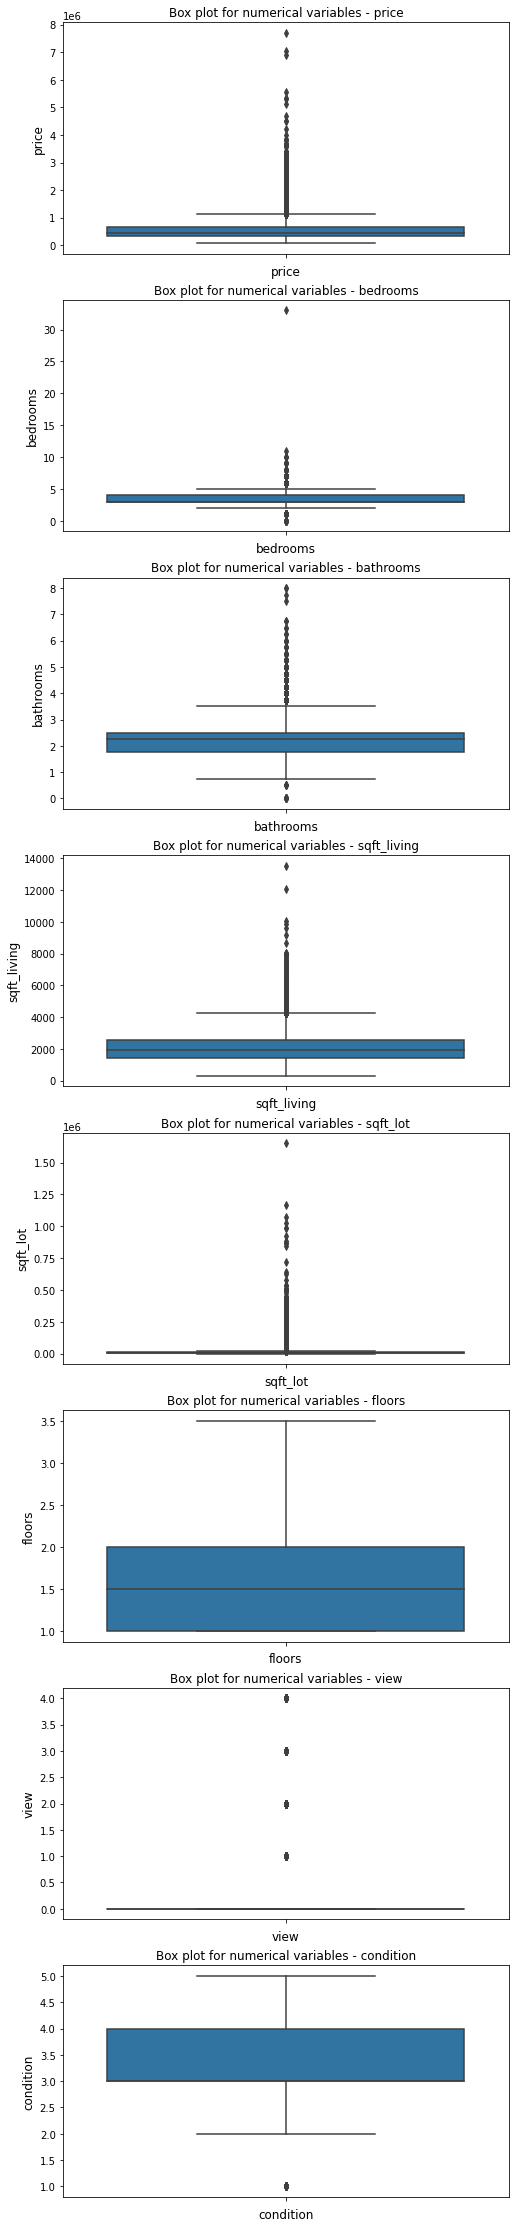

In [29]:
# Checking for outliers. 
# since we have a lot of columns we will divide the total number of columns by two 
# then check the first half here and the next half in the next cell

col_names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition']

fig, ax = plt.subplots(len(col_names), figsize = (8, 40))
for a, col_val in enumerate(col_names):
    sns.boxplot(y=data[col_val], ax=ax[a])
    ax[a].set_xlabel(col_val, fontsize=12)
    ax[a].set_ylabel(col_val, fontsize=12)
    ax[a].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
plt.show()

Observations: floors has no outliers. Bedroom column has one value further away from the rest, we will treat that as a legit outlier and delete it.

The rest of the columns have outliers but we establish that they make sense so we won't be deleting them

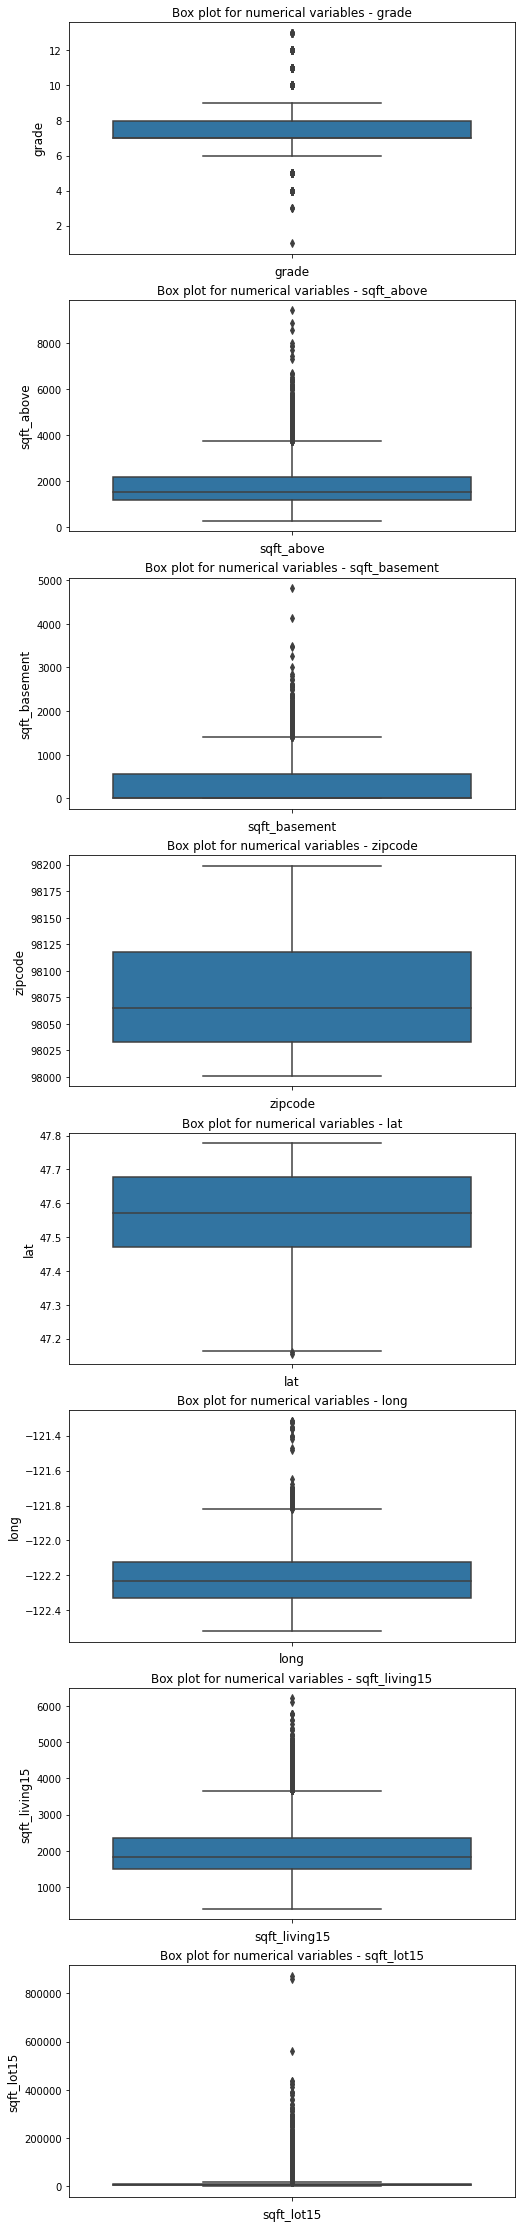

In [30]:
# Checking for outliers for the 2nd half of total number of columns

col_names = ['grade', 'sqft_above', 'sqft_basement','zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
fig, ax = plt.subplots(len(col_names), figsize = (8, 40))

for b, col_val in enumerate(col_names):
    sns.boxplot(y=data[col_val], ax=ax[b])
    ax[b].set_xlabel(col_val, fontsize=12)
    ax[b].set_ylabel(col_val, fontsize=12)
    ax[b].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
plt.show()

Observations: year built and the zipcode have no outliers. In sqft lot 15 have about 3 data points that seem away from the rest, we will explore that further in the next cells. The rest of the columns have outliers, but we establish that they make sense so we wont be deleting them.

In [31]:
# checking the bedroom outlier

data[data['bedrooms'] > 30]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [32]:
# dealing with the outlier

data = data.drop([15870], axis = 'index')

In [33]:
# confirming that the outlier in the bedrooms column has been dropped

data[data['bedrooms'] > 30]

# the outlier has been deleted

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


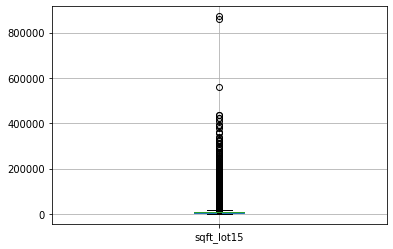

In [34]:
# exploring sqft lot 15 further

data.boxplot(['sqft_lot15'])

Observations: we see 3 data points that are clearly further away from the rest we will treat these as anomalies and delete the records to prevent them from negatively impacting our model.

In [35]:
# let's check how the outlier records look like

df = data[data['sqft_lot15'] > 440000]
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9714,225079036,937500.0,4,4.0,5545,871200,2.0,0,0,3,11,3605,1940,2003,0,98014,47.6760,-121.882,3420,871200
13464,3420069060,790000.0,3,2.5,2640,432036,1.5,0,3,3,10,2640,0,1996,0,98022,47.1795,-122.036,1500,560617
20452,1125079111,1600000.0,4,5.5,6530,871200,2.0,0,2,3,11,6530,0,2008,0,98014,47.6640,-121.878,1280,858132


In [36]:
# deleting the outliers in sqft lot15

data = data.drop([9714, 13464, 20452], axis ='index')

In [37]:
# confirming that the outliers in sqft 15 have been dropped

data[data['sqft_lot15']> 440000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [38]:
# checking for the shape of the remaining dataset

data.shape

(21606, 20)

In [39]:
# in the yr renovated column, we had a lot of zeros. let's check how many records have zeros

df = data[data['yr_renovated'] == 0]
print(df.head())
print(df.shape)

# out of the remaining 21,606 records, 20693 records have houses that were not renovated indicated by 0 in the yr_renovated column.
# since there is a very small number of houses that have been renovated (21,610 - 20696 = 914 = 4% of the entire dataset) 
# We can use this column to create for feature engineering  to show which houses have been renovated or not.

           id      price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520   221900.0         3  ... -122.257           1340        5650
2  5631500400   180000.0         2  ... -122.233           2720        8062
3  2487200875   604000.0         4  ... -122.393           1360        5000
4  1954400510   510000.0         3  ... -122.045           1800        7503
5  7237550310  1230000.0         4  ... -122.005           4760      101930

[5 rows x 20 columns]
(20693, 20)


In [40]:
# renaming our cleaned data

cleaned_data = data

## Data validation

## EDA

### Univariate analysis

In [41]:
# let's start univariate analysis by checking the statistical summary of the cleaned dataset

cleaned_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.160600e+04,2.160600e+04,21606.000000,21606.000000,21606.000000,2.160600e+04,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000
mean,4.580677e+09,5.400953e+05,3.369434,2.114494,2079.510229,1.501017e+04,1.494215,1788.039572,291.470656,1971.000370,84.337962,1986.537952,12665.191706
std,2.876516e+09,3.673363e+05,0.908067,0.769815,917.770218,4.050059e+04,0.540011,827.458595,442.482320,29.372526,401.534790,685.380450,25781.056364
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1422.750000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,3.904931e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068650e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10082.250000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,438213.000000


Observations: 
mean price = $ 540, 095, maximum price = $ 7,700,000

mean bedrooms = 3.369, max = 11

mean bathrooms = 2.11, max bathrooms = 11

mean sqft living = 2079.51, max = 13540

mean sqft lot = 15,010, max = 1,651,359

mean floors = 1.49, max = 3.5

mean sqft above = 1,788, max =9,410

mean sqft basement = 291.47, max = 4820

mean sqft living 15 = 1986.537, max = 6,210

mean sqft lot15 = 12,665, max = 438,213



#### Frequency distribution tables

In [42]:
cleaned_data['bedrooms'].value_counts()

3     9821
4     6879
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

Observations: 3 and 4 bedrooms are the most popular bedrooms among the houses

there is only one house with 11 bedrooms

In [43]:
cleaned_data['bathrooms'].value_counts()

2.50    5377
1.00    3852
1.75    3046
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     135
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50       9
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

Observations: 1.00 to 2.75 bathrooms are the most popular among the houses

In [44]:
cleaned_data['waterfront'].value_counts()

0    21443
1      163
Name: waterfront, dtype: int64

Observations: almost all houses have no waterfront

In [45]:
cleaned_data['view'].value_counts()

0    19485
2      962
3      508
1      332
4      319
Name: view, dtype: int64

Observations: majority of the houses have no views. A few of the houses have 1 to 4 views

In [46]:
cleaned_data['condition'].value_counts()

3    14026
4     5678
5     1700
2      172
1       30
Name: condition, dtype: int64

Observations: majority of the houses condition have a score of 3, followed by 4, 5, 2, and 1

In [47]:
cleaned_data['grade'].value_counts()

7     8980
8     6066
9     2614
6     2038
10    1133
11     397
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [48]:
print(cleaned_data['yr_built'].value_counts().head(20))
print(cleaned_data['yr_built'].value_counts().head(20).sum())

2014    559
2006    454
2005    450
2004    433
2003    421
2007    417
1977    417
1978    387
1968    381
2008    366
1967    350
1979    343
1959    334
1990    320
1962    312
1954    305
2001    304
1987    294
1989    290
1969    280
Name: yr_built, dtype: int64
7417


Observations: 2014, 2006, 2005, 2004 are the leading years with the most built houses

In [49]:
cleaned_data['yr_renovated'].value_counts().head()

0       20693
2014       91
2013       37
2003       36
2000       35
Name: yr_renovated, dtype: int64

Observations: majority of the houses have not been renovated. In 2014, we had 91 houses renovated. In 2013 there were 37 houses that were renovated. 2003 had 36 houses renovated and finally 2000 had the least number of houses renovated at 35.

Generally, houses that were renovated were beyond 2000

In [50]:
cleaned_data['zipcode'].value_counts()

98103    601
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Observations: there are 70 different zipcodes

#### plotting histograms for continuous variables

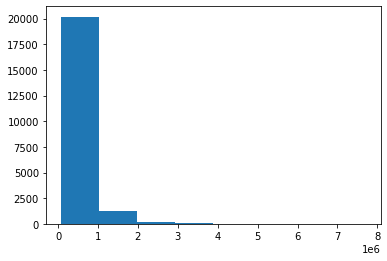

In [51]:
cleaned_data['price'].hist(bins=8, grid=False)

Observations: price is rightly skewed

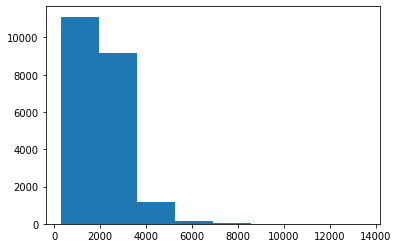

In [52]:
cleaned_data['sqft_living'].hist(bins = 8, grid = False)

sqft_living is rightly skewed

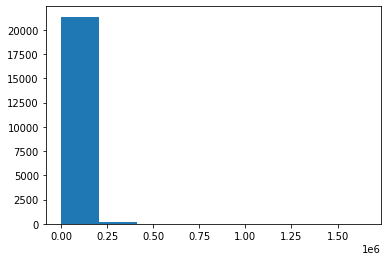

In [53]:
cleaned_data['sqft_lot'].hist(bins=8, grid = False)

sqft_lot is also positively skewed

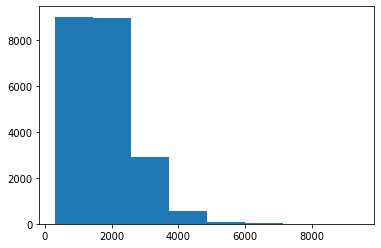

In [54]:
cleaned_data['sqft_above'].hist(bins=8, grid = False)

sqft above is positively skewed

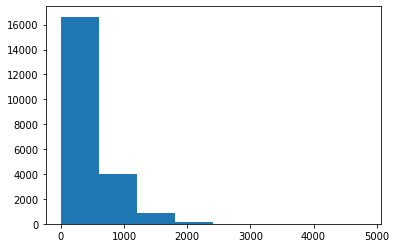

In [55]:
cleaned_data['sqft_basement'].hist(bins=8, grid = False)

sqft basement is positively skewed

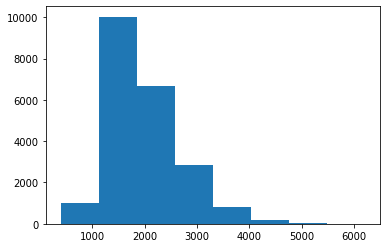

In [56]:
cleaned_data['sqft_living15'].hist(bins=8, grid = False)

Sqft living 15 is close to a normal distribution but shows tendencies of positive skewness

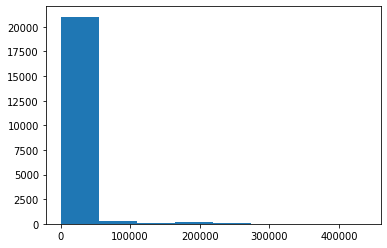

In [57]:
cleaned_data['sqft_lot15'].hist(bins=8, grid = False)

sqft lot 15 also posively skewed 

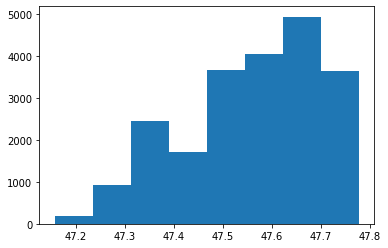

In [58]:
cleaned_data['lat'].hist(bins=8, grid = False)

Latitude is negatively skewed

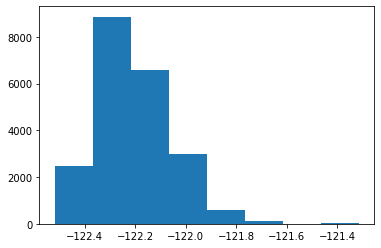

In [59]:
cleaned_data['long'].hist(bins=8, grid = False)

Long is almost normally distributed but shows signs of positive skewness

### Bivariate analysis

#### Heatmap

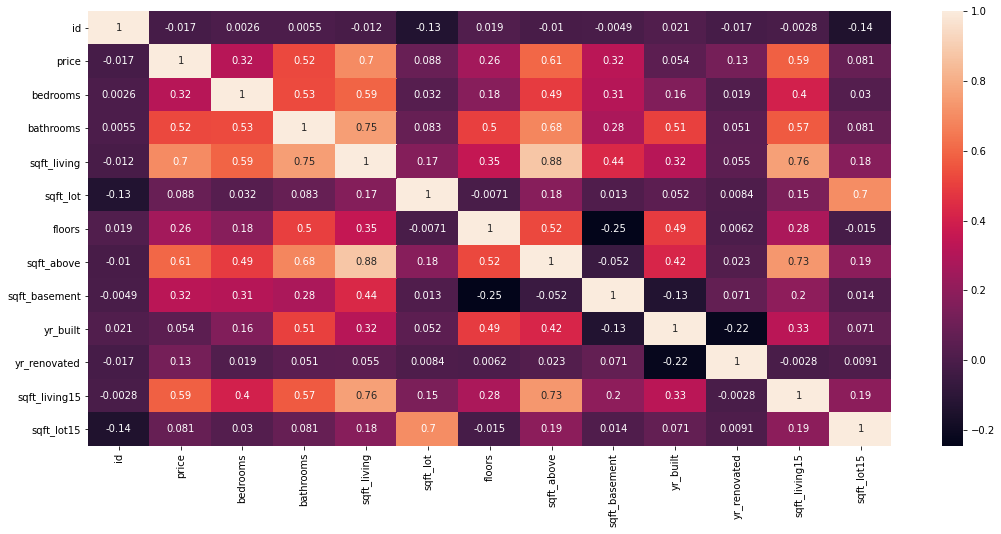

In [60]:
# checking for correlations

fig, ax = plt.subplots(figsize=(18,8))
sns.heatmap(cleaned_data.corr(), annot=True, ax=ax);

 A lot of correlations is seen among sqft variables with each other and other variables such as bathrooms, bedrooms, floors.

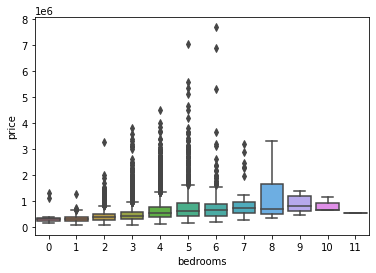

In [61]:
sns.boxplot(x='bedrooms', y='price', data=cleaned_data)
plt.show()

Generally, we see an increase in price with the increase in number of bedrooms. However, between 0 and 7 bedrooms we see a lot of outliers. This could be explained by the location type of the house. It is possible that these houses are located in the city where house prices always tend to be more expensive than small towns.

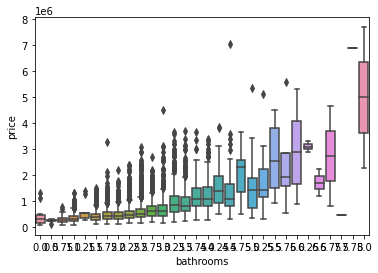

In [62]:
sns.boxplot(x='bathrooms', y='price', data= cleaned_data)
plt.show()

With lower number of bathrooms, there is not so much change in house prices, but as bathrooms increase(from green boxplot) we see an increase in house prices

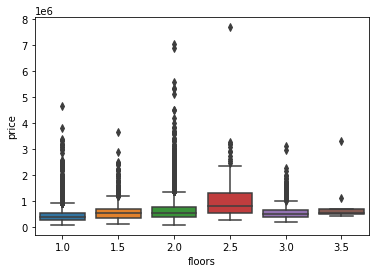

In [63]:
sns.boxplot(x='floors', y='price', data = cleaned_data)
plt.show()

We see there there is not an obvious change in prices with the change in the number of floors, however there are a lot of outliers that suggest otherwise

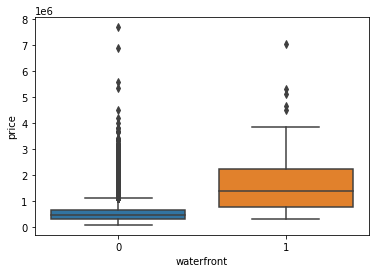

In [64]:
sns.boxplot(x='waterfront', y='price', data=cleaned_data)
plt.show()

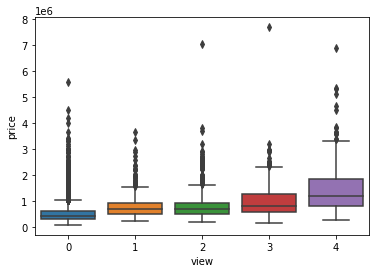

In [65]:
sns.boxplot(x='view', y='price', data = cleaned_data)
plt.show()

With an increase in the number of views, the prices increase as well

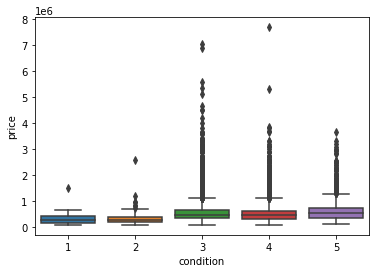

In [66]:
sns.boxplot(x='condition', y='price', data=cleaned_data)
plt.show()

From condition 3-5, the prices are higher compared to condition 1 and 2. We also see a lot of outliers in conditions 3-5

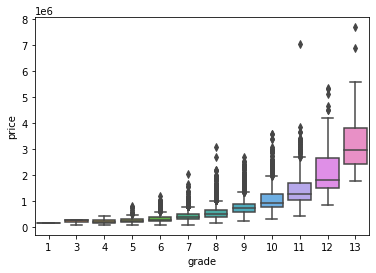

In [67]:
sns.boxplot(x='grade', y='price', data=cleaned_data)

We observe that, generally,as the grade of a house increases, the price also goes up

## Implementing the solution

### Feature Engineering

In [68]:
cleaned_data['yr_built'].max()

2015

In [69]:
# adding a new column for house age, which is the total number of years from the time the house was built

cleaned_data['house_age'] = cleaned_data['yr_built'].max() - cleaned_data['yr_built']

In [70]:
# confirming that the house age column has been added

cleaned_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,60
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,64
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,50
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28


In [71]:
# converting the yr_renovated to categorical column, if 0 the house has been renovated otherwise it had not been renovated

def yr_renovated(year):
  if year == 0:
    return 'no'
  else:
    return 'yes'

cleaned_data['renovated'] = cleaned_data.yr_renovated.apply(lambda score: yr_renovated(score))
cleaned_data['renovated']

0         no
1        yes
2         no
3         no
4         no
        ... 
21608     no
21609     no
21610     no
21611     no
21612     no
Name: renovated, Length: 21606, dtype: object

In [72]:
cleaned_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,60,no
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,64,yes
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82,no
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,50,no
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28,no


house age and renovated have been added

In [74]:
# deleting yr_built and yr_renovated as they are not necessary anymore

cleaned_data.drop(['yr_built', 'yr_renovated'], axis =1, inplace=True)

In [75]:
# confirming that the two columns have been dropped

cleaned_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,60,no
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,64,yes
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82,no
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,50,no
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28,no


In [77]:
# encoding renovated column to numerical values

cleaned_data['renovated'] = cleaned_data['renovated'].astype('category')
cleaned_data['renovated'] = cleaned_data['renovated'].cat.codes
cleaned_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,60,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,64,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,50,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28,0


In [78]:
# dropping id column as we dont need it anymore

cleaned_data.drop(['id'], axis = 1, inplace = True)

# confirming that the column has been dropped

cleaned_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,60,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,64,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,50,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28,0


In [79]:
# checking for the shape of our final dataset
cleaned_data.shape

(21606, 19)

### Feature selection

In [ ]:
# find the best 10 best variables from the ones given that would best predict the sale price of a 

# separing our data into independent and dependent variables

X = cleaned_data.drop('price', axis =1)
y = cleaned_data['price']

model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(X,y)

print('Number of features: %s' % (fit.n_features_))
print('Selected features: %s' % (fit.support_))
print('Feature ranking: %s' % fit.ranking_)


In [96]:
cleaned_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,60,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,64,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,50,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28,0


### Multiple linear regression

### Quantile Regression

### Ridge Regression

### Lasso Regression

### Elastic net regression

## Checking for multicollinearity

## Residual plots

## Heterosckedacity using Barlett's test

## Challenge the solution (provide insights on how you can make improvements in the model)